In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [ ]:
full_data = pd.read_csv("bank-full2.csv")
print("data read sucessfully")

data read sucessfully


In [ ]:
full_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# statistical summary of data set

In [ ]:
full_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot: xlabel='job', ylabel='count'>

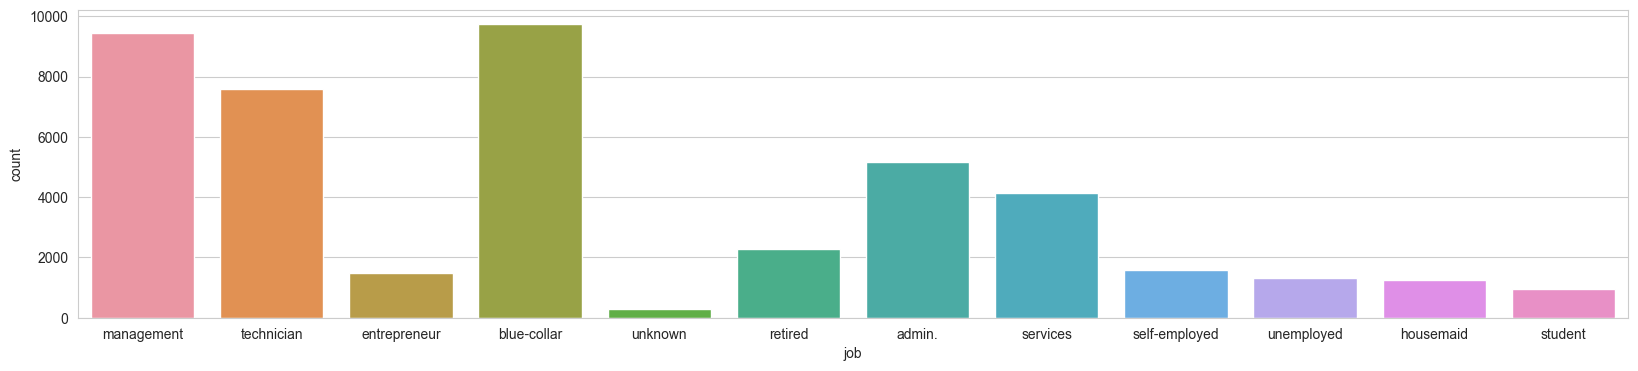

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='job',data=full_data)

<AxesSubplot: xlabel='marital', ylabel='count'>

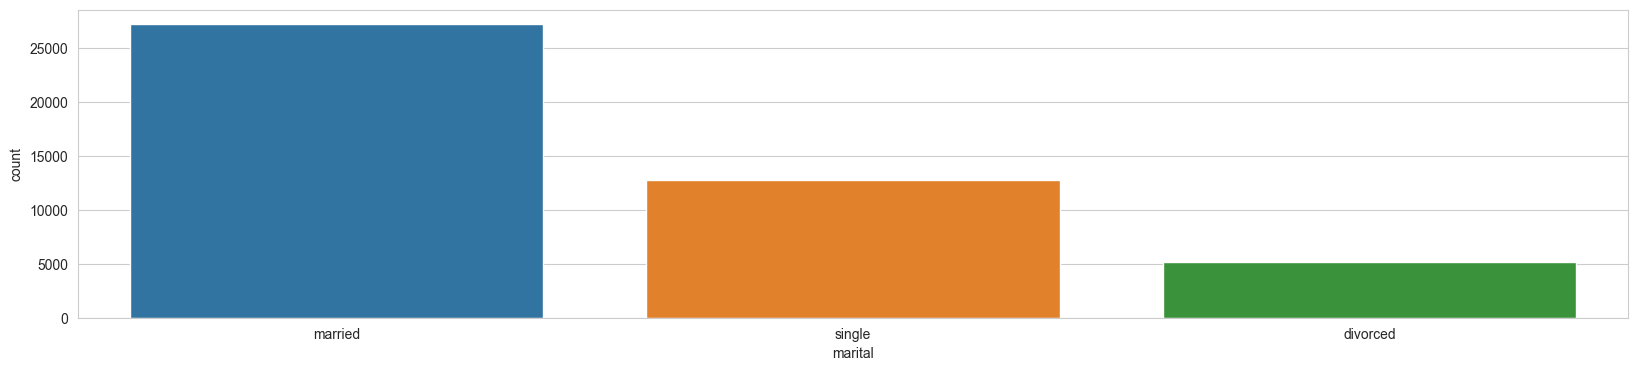

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='marital',data=full_data)

<AxesSubplot: xlabel='education', ylabel='count'>

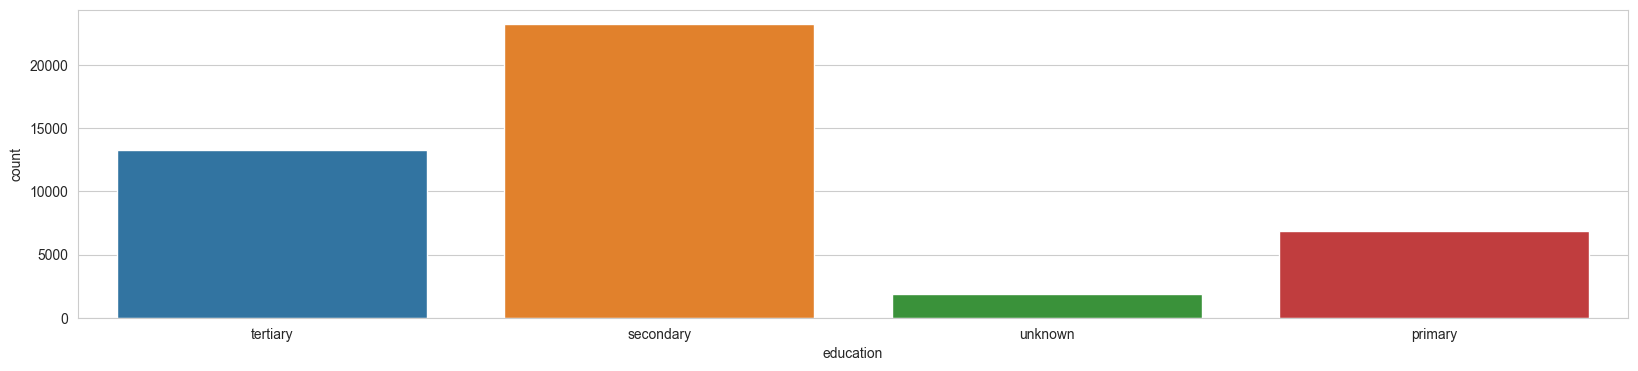

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='education',data=full_data)

<AxesSubplot: >

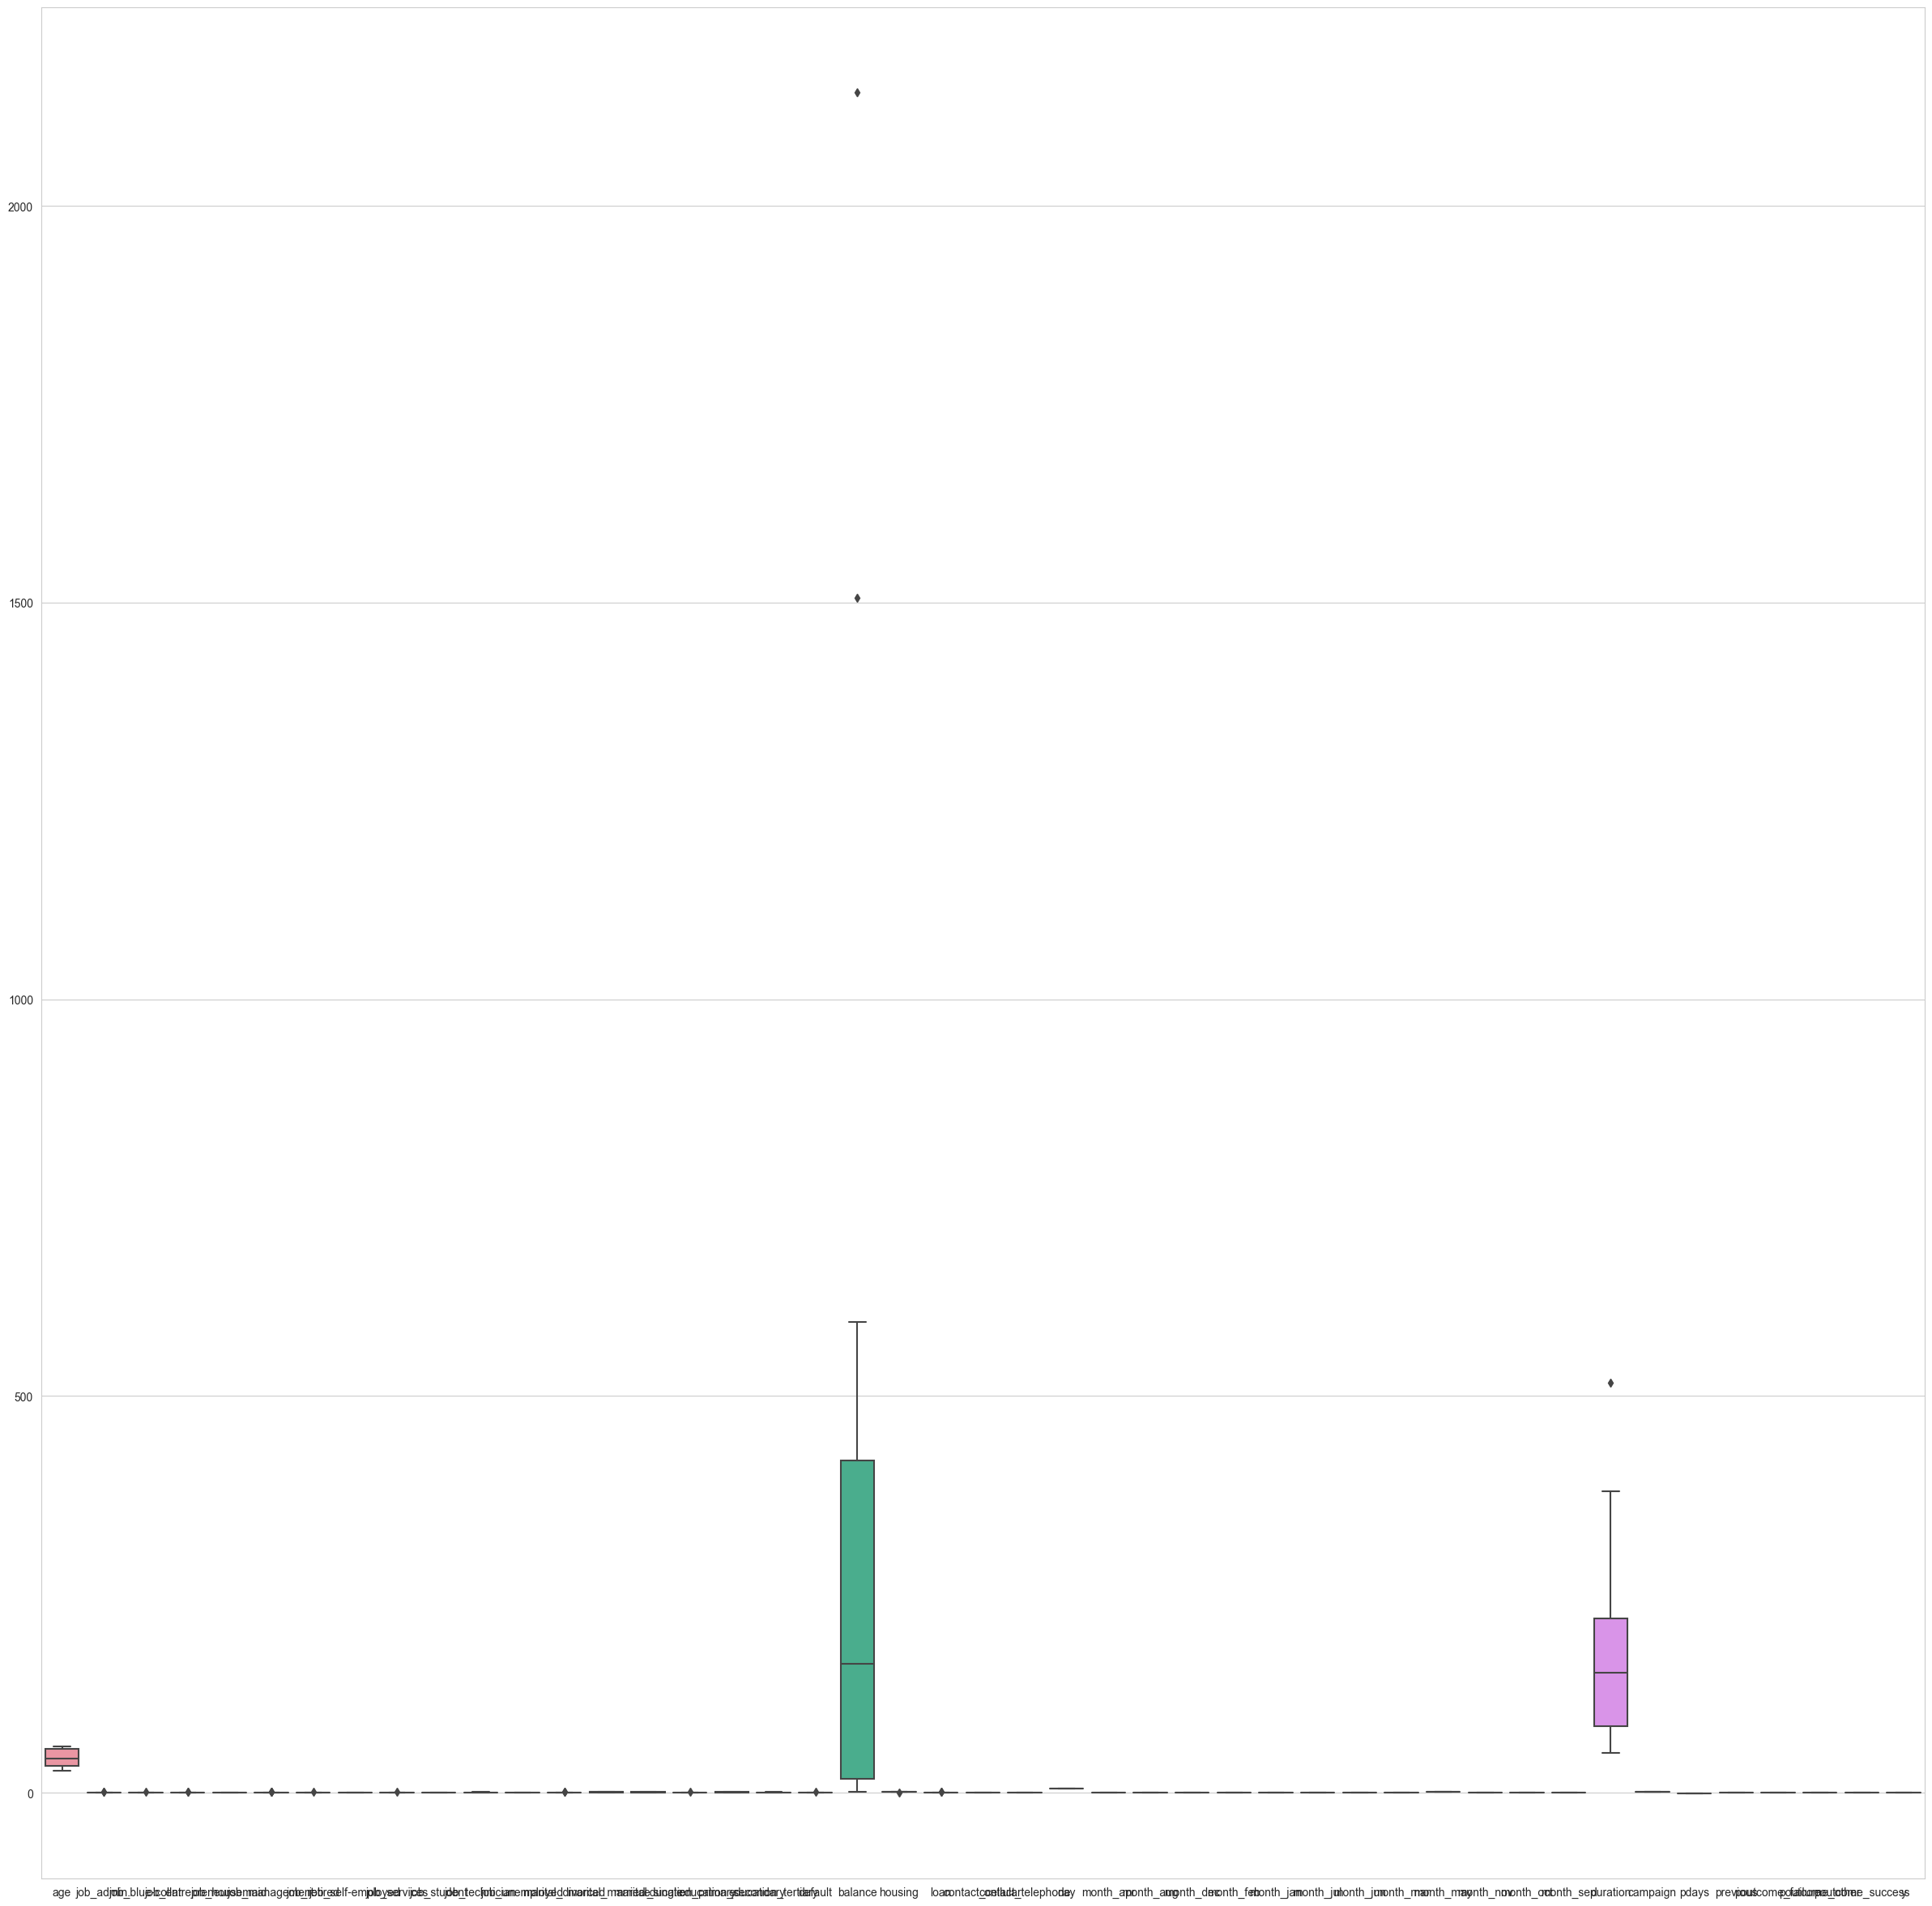

In [ ]:
plt.figure(figsize=(30,30))
sns.boxplot(data=full_data.iloc[:,0:15])

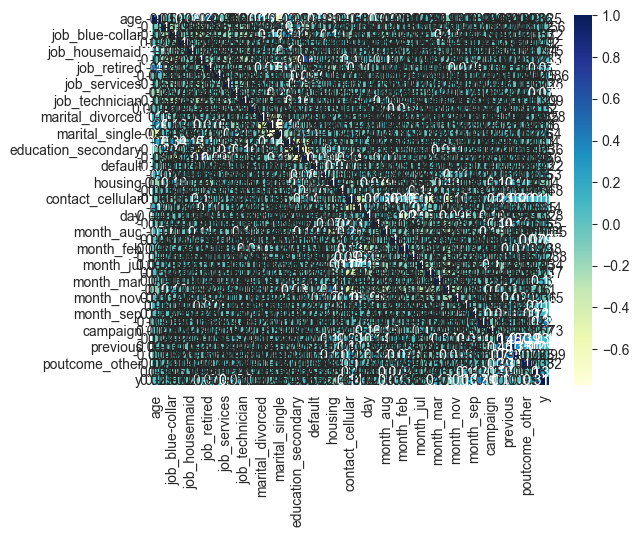

In [ ]:
dataplot = sns.heatmap(full_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
def correlation(df, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

In [ ]:
df_selected=correlation(full_data,0.8)

C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1035159784.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1319424327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_selected.corr(),cmap="YlGnBu",annot=True)


<AxesSubplot: >

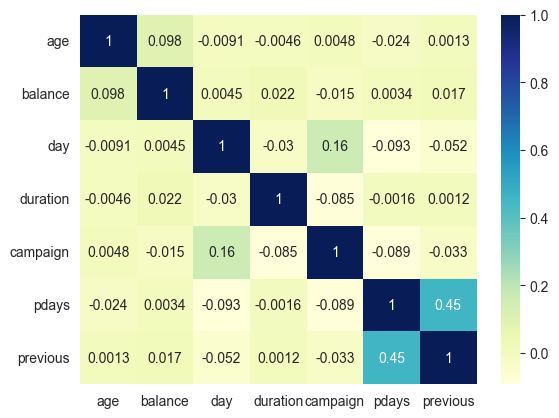

In [ ]:
sns.heatmap(df_selected.corr(),cmap="YlGnBu",annot=True)

# splitting of data into feature and target data

In [ ]:
feature_col = full_data.columns[:-1]  # all columns but last are features
target_col = full_data.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_col))
print ("Target column: {}".format(target_col))
X_all = full_data[feature_col]
y_all = full_data[target_col]
print("FEATURE CLOUMNS ARE ")
print (X_all.head()) # print the first 5 rows
print("TARGET VALUES ARE")
print (y_all.head())

Feature column(s):-
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
Target column: y
FEATURE CLOUMNS ARE 
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown

# preprocessing of data

In [ ]:
def preprocess(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    out = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        out= out.join(col_data)

    return out
full_data=preprocess(full_data)
print("FEATURES COLUMNS AFTER PREPROCESSING IS",full_data)

C:\Users\HP\AppData\Local\Temp\ipykernel_15576\4147792551.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, col_data in X.iteritems():


FEATURES COLUMNS AFTER PREPROCESSING IS        age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0       58           0                0                 0              0   
1       44           0                0                 0              0   
2       33           0                0                 1              0   
3       47           0                1                 0              0   
4       33           0                0                 0              0   
...    ...         ...              ...               ...            ...   
45206   51           0                0                 0              0   
45207   71           0                0                 0              0   
45208   72           0                0                 0              0   
45209   57           0                1                 0              0   
45210   37           0                0                 1              0   

       job_management  job_retired  job_self-em

# identifying the feature and target columns in the data

In [ ]:
# Extract feature columns
feature_col = list(full_data.columns[:-1])

# Extract target column 'responded'
target_col = full_data.columns[-1]

# Show the list of columns
print("Feature columns are:{}".format(feature_col))
print("Target columns are: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = full_data[feature_col]
y_all = full_data[target_col]

# Show the feature information by printing the first five rows
print("Feature values:")
print(X_all.head(5))

Feature columns are:['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'default', 'balance', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'day', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_other', 'poutcome_success']
Target columns are: y
Feature values:
   age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58           0                0                 0              0   
1   44           0                0                 0              0   
2   33           0                0                 1   

# checking for missing values after featuring the data

In [ ]:
X_all.isnull().sum()

age                    0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
default                0
balance                0
housing                0
loan                   0
contact_cellular       0
contact_telephone      0
day                    0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
duration               0
campaign               0
pdays                  0


# training and validation of data

In [ ]:
validation_size = 0.40
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_all, y_all, stratify = y_all,
                                                    test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation  set 'yes' pct = {:.2f}%".format(100 * (y_validation == 1).mean()))

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_validation.shape[0]))

Train set 'yes' pct = 11.70%
Validation  set 'yes' pct = 11.70%
Training set has 27126 samples.
Validation set has 18085 samples.


In [ ]:
X = full_data.iloc[:, [0,1,2,3,5,6,7,11]].values
y = full_data.iloc[:, 12].values

In [ ]:
X

array([[58,  0,  0, ...,  0,  0,  0],
       [44,  0,  0, ...,  0,  0,  0],
       [33,  0,  0, ...,  0,  0,  0],
       ...,
       [72,  0,  0, ...,  1,  0,  0],
       [57,  0,  1, ...,  0,  0,  0],
       [37,  0,  0, ...,  0,  0,  0]], dtype=int64)

# buliding of models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[7720,  286],
       [ 979,   58]], dtype=int64)

In [ ]:
ac

0.8601127944266284

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
accuracy=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
accuracy

array([0.86011279, 0.86011279])

In [ ]:
Precision

array([0.88745833, 0.16860465])

In [ ]:
Recall

array([0.96427679, 0.05593057])

In [ ]:
Fscore

array([0.92427417, 0.0839971 ])

In [ ]:
specificity

array([0.05593057, 0.96427679])

In [ ]:
FPR

array([0.94406943, 0.03572321])

In [ ]:
error_rate = 1-ac
error_rate

0.13988720557337164

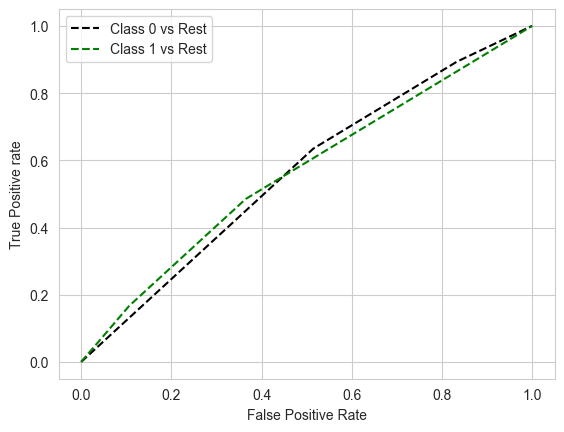

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# RANDOM FOREST FOR CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.24195510339489
Mean Squared Error: 0.1146743337388035
Root Mean Squared Error: 0.3386359900229205


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[8006,    0],
       [1037,    0]], dtype=int64)

In [ ]:
ac

0.8853256662611965

In [ ]:
accuracy

array([0.86011279, 0.86011279])

In [ ]:
Precision

array([0.88745833, 0.16860465])

In [ ]:
Recall

array([0.96427679, 0.05593057])

In [ ]:
Fscore

array([0.92427417, 0.0839971 ])

In [ ]:
specificity

array([0.05593057, 0.96427679])

In [ ]:
FPR

array([0.94406943, 0.03572321])

In [ ]:
error_rate = 1-ac
error_rate

0.11467433373880354

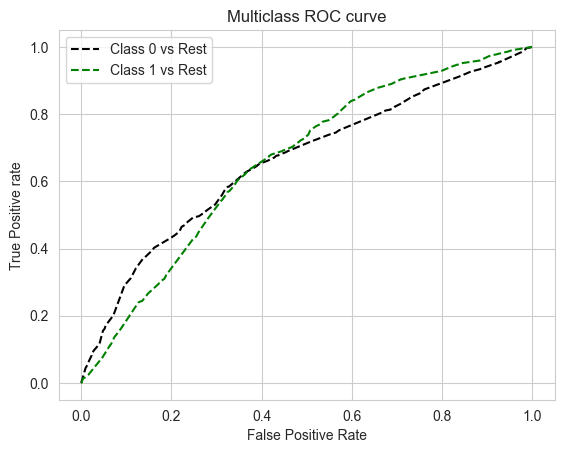

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


# NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.8496074311622249

In [ ]:
cm

array([[7597,  409],
       [ 951,   86]], dtype=int64)

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
accuracy=(TP+TN)/(TP+TN+FP+FN)

In [ ]:
accuracy

array([0.84960743, 0.84960743])

In [ ]:
Precision

array([0.88874591, 0.17373737])

In [ ]:
Recall

array([0.94891332, 0.08293153])

In [ ]:
Fscore

array([0.91784463, 0.11227154])

In [ ]:
specificity

array([0., 1.])

In [ ]:
FPR

array([0.91706847, 0.05108668])

In [ ]:
error_rate = 1-ac
error_rate

0.15039256883777508

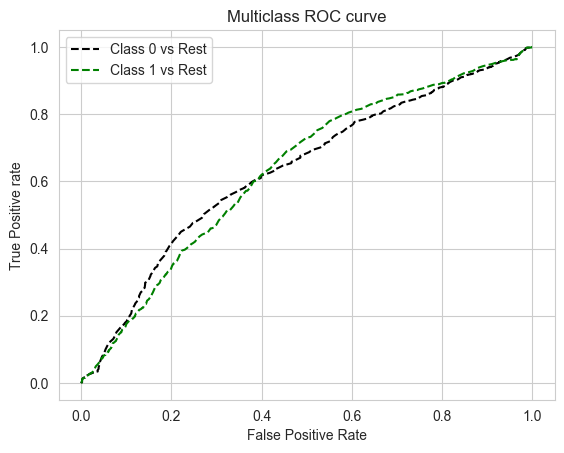

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


# DECISION TREE USING INFORMATION GAIN

In [ ]:
from collections import Counter
import math
import os
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = full_data[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

In [ ]:
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('class')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['class'] for dataframe in split_data]
        gain = information_gain(dataset['class'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain
new_data = split(full_data, find_best_split(full_data)[0])

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: Found input variables with inconsistent numbers of samples: [11303, 9043]

In [ ]:
ac

0.8496074311622249

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
accuracy=(TP+TN)/(TP+TN+FP+FN)
error_rate=1-ac

In [ ]:
accuracy

array([0.84960743, 0.84960743])

In [ ]:
Precision

array([0.88874591, 0.17373737])

In [ ]:
Recall

array([0.94891332, 0.08293153])

In [ ]:
Fscore

array([0.91784463, 0.11227154])

In [ ]:
error_rate

0.15039256883777508

In [ ]:
specificity

array([0.08293153, 0.94891332])

In [ ]:
FPR

array([0.91706847, 0.05108668])

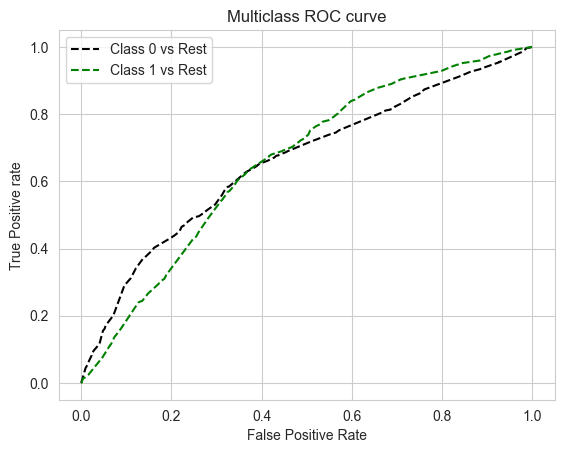

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# LINEAR SVM

In [ ]:
X = full_data.iloc[:, [0,1,2,4,5,6,7,8,9]].values
y = full_data.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = svm_model_linear.score(X_test, y_test)

In [ ]:
accuracy

0.968152161893177

In [ ]:
error_rate = 1-accuracy
error_rate

0.03184783810682301

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[8755,    0],
       [ 288,    0]], dtype=int64)

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
accuracy=(TP+TN)/(TP+TN+FP+FN)

C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1860161848.py:12: RuntimeWarning: invalid value encountered in divide
  Precision = TP/(TP+FP)
C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1860161848.py:14: RuntimeWarning: divide by zero encountered in divide
  Fscore=2/((1/Precision)+(1/Recall))


In [ ]:
accuracy

array([0.96815216, 0.96815216])

In [ ]:
Precision

array([0.96815216,        nan])

In [ ]:
Recall

array([1., 0.])

In [ ]:
Fscore

array([0.98381841,        nan])

In [ ]:
specificity

array([0., 1.])

In [ ]:
FPR

array([1., 0.])

# LOGISTIC REGRESSION WITH REGULARISATION

In [ ]:
X = full_data.iloc[:, [0,1,2,4,5,6,7,8,9]].values
y = full_data.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[8734,    0],
       [ 309,    0]], dtype=int64)

In [ ]:
ac

0.9658299236978879

In [ ]:
error_rate = 1-ac
error_rate

0.03417007630211211

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
accuracy=(TP+TN)/(TP+TN+FP+FN)

C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1609115209.py:11: RuntimeWarning: invalid value encountered in divide
  Precision = TP/(TP+FP)
C:\Users\HP\AppData\Local\Temp\ipykernel_15576\1609115209.py:13: RuntimeWarning: divide by zero encountered in divide
  Fscore=2/((1/Precision)+(1/Recall))


In [ ]:
accuracy

array([0.96582992, 0.96582992])

In [ ]:
Precision

array([0.96582992,        nan])

In [ ]:
Recall

array([1., 0.])

In [ ]:
Fscore

array([0.98261799,        nan])

In [ ]:
specificity

array([0., 1.])

In [ ]:
FPR

array([1., 0.])

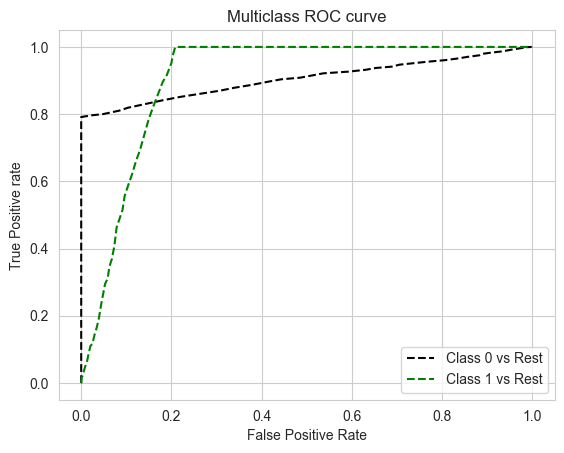

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = logisticRegr.predict(X_test)
pred_prob = logisticRegr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# DECISION TREE USING GINI INDEX

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5)
clf_gini.fit(X_train, y_train)
y_pred_train= clf_gini.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_train,y_pred_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[32787,     0],
       [ 1121,     0]], dtype=int64)

In [ ]:
ac

0.9669399551728206

In [ ]:
error_rate = 1-ac
error_rate

0.03306004482717939

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
error_rate=1-ac
accuracy=(TP+TN)/(TP+TN+FP+FN)

C:\Users\HP\AppData\Local\Temp\ipykernel_15576\2517284730.py:12: RuntimeWarning: invalid value encountered in divide
  Precision = TP/(TP+FP)
C:\Users\HP\AppData\Local\Temp\ipykernel_15576\2517284730.py:14: RuntimeWarning: divide by zero encountered in divide
  Fscore=2/((1/Precision)+(1/Recall))


In [ ]:
accuracy

array([0.96693996, 0.96693996])

In [ ]:
Precision

array([0.96693996,        nan])

In [ ]:
Recall

array([1., 0.])

In [ ]:
Fscore

array([0.98319214,        nan])

In [ ]:
specificity

array([0., 1.])

In [ ]:
FPR

array([1., 0.])

In [ ]:
error_rate

0.03306004482717939

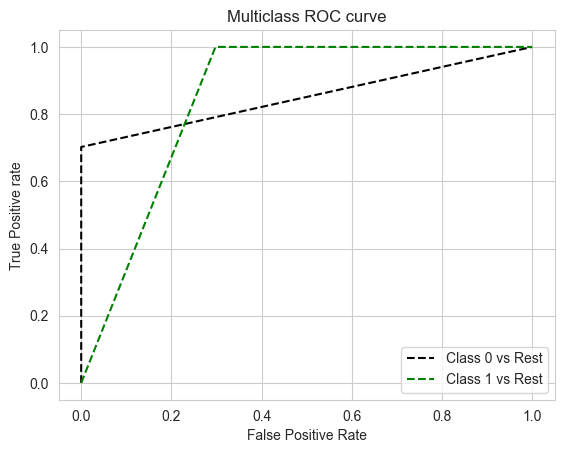

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);